In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
from skimage import io

In [ ]:
def plot_img(img, cmap='gray'):
    plt.figure(figsize=(12,6))
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

## Loading image

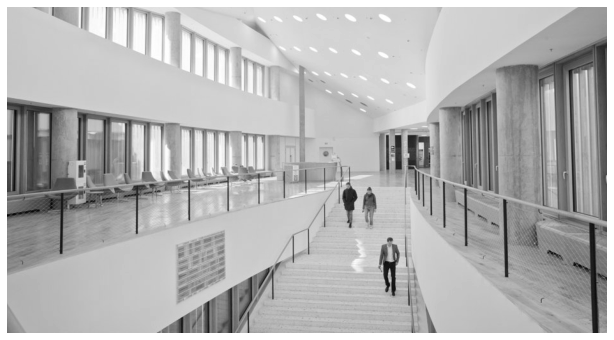

In [5]:
img_orig = io.imread('skoltech_1.png')
img = cv2.imread('skoltech_1.png', 0)

plot_img(img)

1. How can you detect all the lamps on the image? (ofc with minimum FP)

2. Write simple template matching using the `convolve_same` function from the previous lecture. (Code is given below)

3. Why it works so different from the `skimage.feature.template_matching`? Find a solution and write the template matching function based on the convolution, which gives the same result.

4. How to derive separate objects from the correlation map? Find and plot the distinct bounding boxes around detected lamps.

5. How the algorithm could be improved to increase detection Recall while preserving the near-zero FP rate?

### Convolution from lecture 2

In [ ]:
def convolve(image, kernel):
    assert image.ndim == kernel.ndim == 2
    
    kernel = np.flip(kernel, axis=range(kernel.ndim))
    shape = np.array(image.shape) - kernel.shape + 1
    result = np.empty(shape, dtype=float) # we'll keep things simple and always return float
    h, w = kernel.shape
        
    for i, j in np.ndindex(*shape):
        result[i, j] = (image[i:i + h, j:j + w] * kernel).sum()

    return result

    
def convolve_same(image, kernel):
    # pad image before convolution to obtain same resulting shape
    delta = np.array(kernel.shape) - 1
    # left and right padding
    left = delta // 2
    right = delta - left
    padding = np.array([left, right]).T

    image = np.pad(image, padding, mode='constant') 
    return convolve(image, kernel)